# Aplicación 3: clasificación de textos

Comenzaremos, antes que nada, importando algunas herramientas útiles:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Ejemplo: Clasificando Texto

Usaremos en este caso, como método de clasificación, al algoritmo Bayes ingenuo multinomial ("multinomial naive Bayes") el cual es usualmente utilizado para categoriación de textos, donde las características (features) se relacionan con el número de palabras o las frecuencias con que las palabras ocurren dentro de los documentos a ser clasificados.
La discusión de la extracción de estas features a partir del texto escapa al alcance de esta notebook, solo mencionaremos por el momento que usaremos las features de cuenta de palabras ralas de la colección 20 Newsgroups para mostrar cómo podriamos clasificar estos documentos cortos en categorías.
 
Descarguemos los datos y demos un vistazo a los nombres objetivo:

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Por simplicidad, seleccionaremos aquí sólo unas pocas categorías y descargaremos los conjuntos de entrenamiento y prueba:

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Aqui tenemos una entrada representativa de estos datos:

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Para utilizar estos datos para el aprendizaje automático, debemos poder convertir el contenido de cada cadena en un vector de números. Para esto, usaremos el vectorizador TF-IDF, y crearemos un pipeline que lo una a un clasificador Bayes ingenuo multinomial:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Con este pipeline, podemos aplicar el modelo a los datos de entrenamiento y predecir las etiquetas para los datos de prueba:

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Ahora que hemos predicho las etiquetas para los datos de prueba, podemos evaluarlos para conocer el rendimiento del clasificador. Por ejemplo, aquí está la matriz de confusión entre las etiquetas verdaderas y las predichas para los datos de prueba:

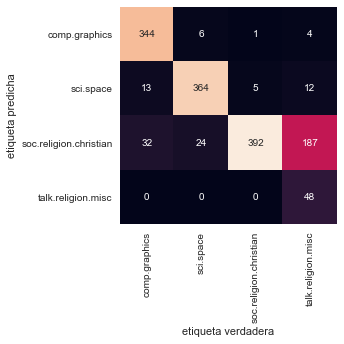

In [7]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('etiqueta verdadera')
plt.ylabel('etiqueta predicha');

Evidentemente, incluso este clasificador muy simple puede diferenciar con éxito noticias sobre ciencia del espacio de aquellas relacionadas a computación, pero se confunde entre aquellas que hablan de cristianismo y religión.
¡Esta es quizás un área esperada de confusión!

Lo interesante aquí es que ahora tenemos las herramientas para determinar la categoría para *cualquier* string, usando el método ``predict()`` de este pipeline.
Aquí hay una función de utilidad rápida que devolverá la predicción para un único string:

In [8]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Probémoslo:

In [9]:
predict_category('sending a payload to the ISS')

'sci.space'

In [10]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [11]:
predict_category('determining the screen resolution')

'comp.graphics'

Recuerde que esto no es nada más que un simple modelo de probabilidad simple para la frecuencia (ponderada) de cada palabra en el string; sin embargo, el resultado es sorprendente.
Incluso un algoritmo muy ingenuo, cuando se usa con cuidado y se entrena en un gran conjunto de datos de alta dimensionalidad, puede ser sorprendentemente efectivo.